## Loading the data

In [1]:
import pandas as pd
import numpy as np

cc_path = "../data/raw/creditcard.csv"

cc_df = pd.read_csv(cc_path)


## shape and information about the credit card data

In [12]:
cc_df.shape, cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

((283726, 31), None)

## validating tatget column

In [2]:
cc_df['Class'] = cc_df['Class'].astype(int)

## Remove Invalid Values

In [3]:
cc_df = cc_df[
    (cc_df['Amount'] >= 0) &
    (cc_df['Time'] >= 0)
]

## Null and duplicate value count

In [8]:
cc_df.isna().sum()
cc_df.duplicated().sum()

np.int64(1081)

## Dropping duplicate rows

In [10]:
cc_df = cc_df.drop_duplicates()

In [11]:
cc_df.duplicated().sum()

np.int64(0)

## Saving clean Credit data

In [13]:
cc_df.to_csv("../data/processed/creditcard_clean.csv", index=False) 

# EDA on Credit card data

## Univariate analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2")

cc_df = pd.read_csv("../data/processed/creditcard_clean.csv")

## class distribution 

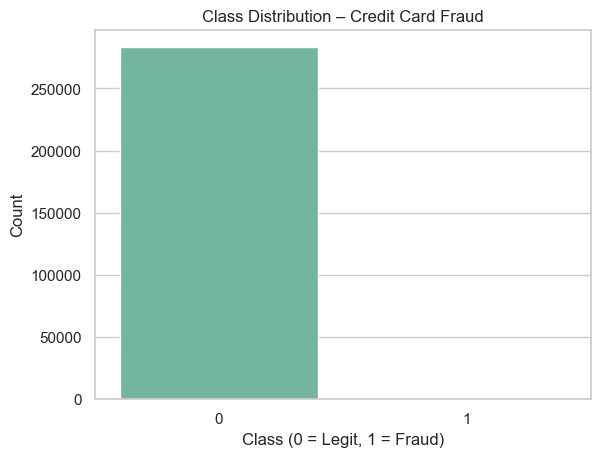

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [13]:
sns.countplot(x='Class', data=cc_df)
plt.title("Class Distribution – Credit Card Fraud")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

cc_df['Class'].value_counts(normalize=True)


## Univariate Analysis

### Transaction amount and Time distribution

c:\Users\hp\Desktop\python-projects\Detection-of-fraud-cases-for-E-commerce\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


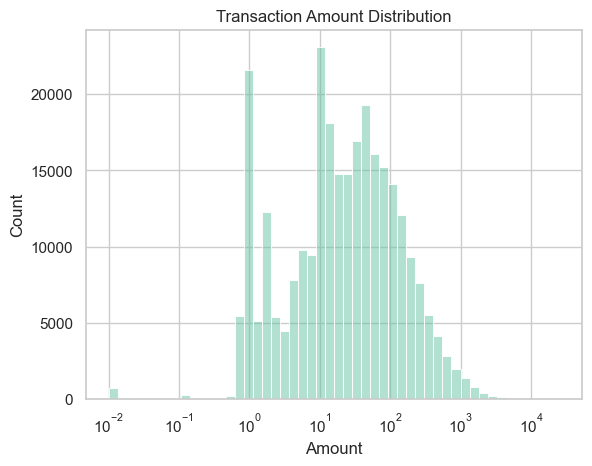

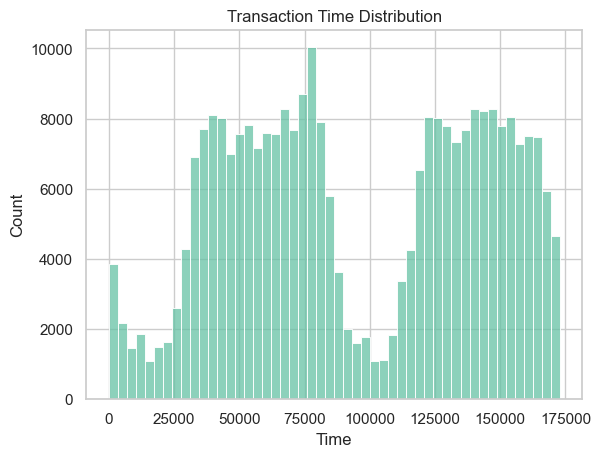

In [ ]:
# Transaction amount
sns.histplot(cc_df['Amount'], bins=50, kde=True, log_scale=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Time 
sns.histplot(cc_df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()


## Bivariate Analysis

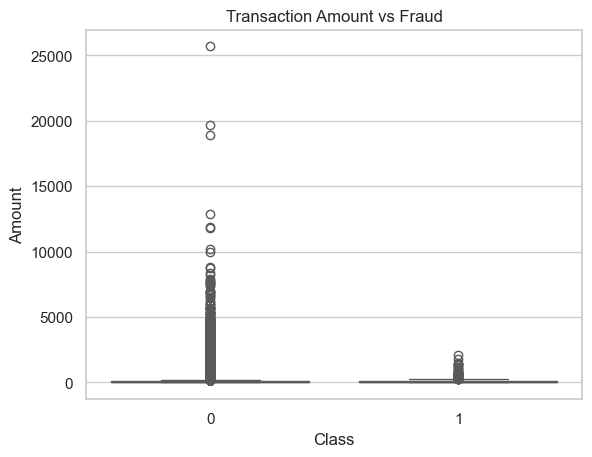

In [15]:
sns.boxplot(x='Class', y='Amount', data=cc_df)
plt.title("Transaction Amount vs Fraud")
plt.show()


## PCA Feature Separation

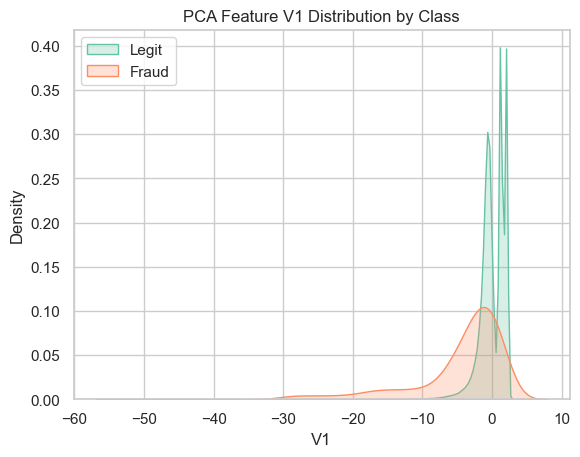

In [16]:
sns.kdeplot(cc_df[cc_df['Class']==0]['V1'], label='Legit', fill=True)
sns.kdeplot(cc_df[cc_df['Class']==1]['V1'], label='Fraud', fill=True)
plt.title("PCA Feature V1 Distribution by Class")
plt.legend()
plt.show()
